### Risk index/safety index/metric ideation

- (fatalities + major injuries + minor injuries) / total passengers?
- mean of the above numbers for every make and model?
- risk index number with weights for fatal_fraction, serious_fraction, minor_fraction

In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [109]:
df = pd.read_csv('Data/data_cleaned_and_amended.csv')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       37461 non-null  object 
 1   Year                       37461 non-null  int64  
 2   Month                      37461 non-null  int64  
 3   Location                   37459 non-null  object 
 4   Country                    37461 non-null  object 
 5   Injury_Severity            37461 non-null  object 
 6   Damage_Type                37461 non-null  object 
 7   Aircraft_Category          37461 non-null  object 
 8   Make                       37461 non-null  object 
 9   Model                      37461 non-null  object 
 10  Engines                    37461 non-null  float64
 11  Engine_Type                36420 non-null  object 
 12  Fatal_Injuries             37461 non-null  float64
 13  Serious_Injuries           37461 non-null  flo

In [123]:
df

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size,Mean_Risk_Index,Model_Total_Accidents,Make_Model,Make_and_Model
0,1990-01-01,1990,1,"ELKHART, IN",United States,Non-Fatal,Substantial,Airplane,cessna,150F,...,0.0,0.0,0.0,1.0,0.0,Small,0.140244,164,"cessna, 150F",cessna 150F
1,1990-01-02,1990,1,"MILLIS, MA",United States,Non-Fatal,Substantial,Airplane,cessna,150,...,0.0,0.0,1.0,0.0,0.1,Small,0.101643,439,"cessna, 150",cessna 150
2,1990-01-03,1990,1,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,cessna,172M,...,0.0,0.0,0.0,1.0,0.0,Small,0.122319,539,"cessna, 172M",cessna 172M
3,1990-01-03,1990,1,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,Airplane,aeronca,11CC,...,0.0,0.0,0.0,1.0,0.0,Small,0.058333,6,"aeronca, 11CC",aeronca 11CC
4,1990-01-03,1990,1,"APPLE VALLEY, CA",United States,Non-Fatal,Substantial,Airplane,mooney,MARK 22,...,0.0,0.0,0.0,1.0,0.0,Small,0.000000,1,"mooney, MARK 22",mooney MARK 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37456,2022-12-12,2022,12,"Knoxville, TN",United States,Non-Fatal,Substantial,Airplane,cessna,172,...,0.0,0.0,0.0,1.0,0.0,Small,0.089862,1102,"cessna, 172",cessna 172
37457,2022-12-12,2022,12,"Redding, CA",United States,Minor,Substantial,Airplane,airbus,EC 130 T2,...,0.0,1.0,0.0,0.0,0.3,Small,0.175000,2,"airbus, EC 130 T2",airbus EC 130 T2
37458,2022-12-13,2022,12,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,piper,PA42,...,0.0,0.0,0.0,1.0,0.0,Small,0.000000,1,"piper, PA42",piper PA42
37459,2022-12-14,2022,12,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,cirrus,SR22,...,0.0,0.0,0.0,1.0,0.0,Small,0.217911,217,"cirrus, SR22",cirrus SR22


In [124]:
df['Make_Model'] = df['Make'] + ', ' + df['Model']

In [125]:
df_make_model = df.groupby(['Make', 'Model'])[['Mean_Risk_Index', 'Model_Total_Accidents']].mean()


In [126]:
df['Make_and_Model'] = df['Make'] + ' ' + df['Model']


In [127]:
top_ten = ['cessna 185', 'cessna 180', 'piper PA 22', 'cessna 170B', 'cessna 172R', 'cessna 170', 'grumman G 164A', 'piper PA 18', 'cessna 120', 'cessna 140']

filtered_df = df[df['Make_and_Model'].isin(top_ten)]

In [128]:
filtered_df

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size,Mean_Risk_Index,Model_Total_Accidents,Make_Model,Make_and_Model
9,1990-01-05,1990,1,"AGUA DULCE, CA",United States,Non-Fatal,Destroyed,Airplane,cessna,185,...,0.0,0.0,0.0,1.0,0.0,Small,0.053330,167,"cessna, 185",cessna 185
16,1990-01-06,1990,1,"BETTLES, AK",United States,Non-Fatal,Substantial,Airplane,piper,PA 22,...,0.0,0.0,0.0,1.0,0.0,Small,0.053941,129,"piper, PA 22",piper PA 22
45,1990-01-13,1990,1,"CROCKETT, TX",United States,Non-Fatal,Substantial,Airplane,cessna,170,...,0.0,0.0,0.0,1.0,0.0,Small,0.068819,120,"cessna, 170",cessna 170
74,1990-01-20,1990,1,"LONGMIRE, WA",United States,Fatal,Destroyed,Airplane,piper,PA 18,...,1.0,0.0,0.0,0.0,0.6,Small,0.075128,390,"piper, PA 18",piper PA 18
84,1990-01-21,1990,1,"WILLOW, AK",United States,Non-Fatal,Substantial,Airplane,cessna,185,...,0.0,0.0,0.0,1.0,0.0,Small,0.053330,167,"cessna, 185",cessna 185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37373,2022-10-08,2022,10,"Monument Valley, UT",United States,Non-Fatal,Substantial,Airplane,cessna,170B,...,0.0,0.0,0.0,1.0,0.0,Small,0.066126,265,"cessna, 170B",cessna 170B
37392,2022-10-20,2022,10,"Georgetown, CA",United States,Non-Fatal,Substantial,Airplane,cessna,140,...,0.0,0.0,0.0,1.0,0.0,Small,0.083156,282,"cessna, 140",cessna 140
37425,2022-11-10,2022,11,"Chickaloon, AK",United States,Fatal,Substantial,Airplane,piper,PA 18,...,1.0,0.0,0.0,0.0,0.6,Small,0.075128,390,"piper, PA 18",piper PA 18
37433,2022-11-15,2022,11,"Kahlotus, WA",United States,Serious,Substantial,Airplane,cessna,180,...,0.0,0.0,1.0,0.0,0.1,Small,0.053314,439,"cessna, 180",cessna 180


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'cessna 185'),
  Text(1, 0, 'piper PA 22'),
  Text(2, 0, 'cessna 170'),
  Text(3, 0, 'piper PA 18'),
  Text(4, 0, 'cessna 180'),
  Text(5, 0, 'cessna 120'),
  Text(6, 0, 'grumman G 164A'),
  Text(7, 0, 'cessna 140'),
  Text(8, 0, 'cessna 170B'),
  Text(9, 0, 'cessna 172R')])

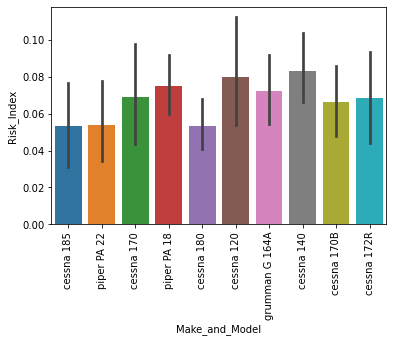

In [117]:
sns.barplot(x='Make_and_Model', y='Risk_Index', data=filtered_df)
plt.xticks(rotation=90)

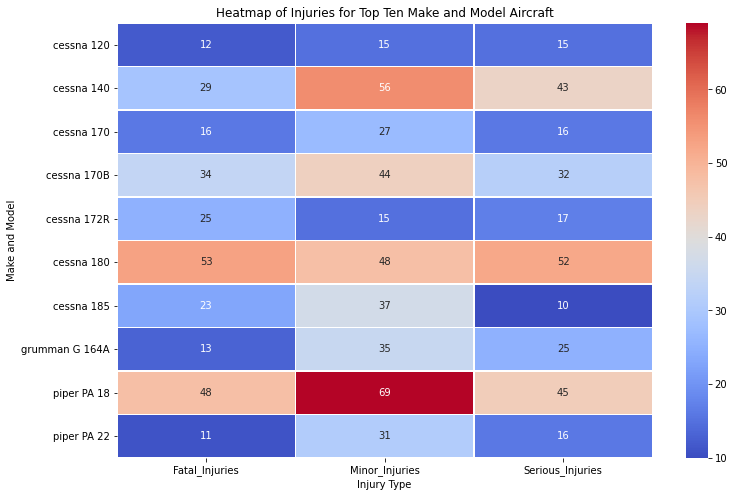

In [131]:
columns_of_interest = ['Make_and_Model', 'Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries']

# Filter the DataFrame for these columns
filtered_df_heatmap = filtered_df[columns_of_interest]

# Create a pivot table that sums the injury metrics for each Make_and_Model
pivot_table = filtered_df_heatmap.pivot_table(index='Make_and_Model', 
                                              values=['Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries'], 
                                              aggfunc='sum')

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding title and labels
plt.title('Heatmap of Injuries for Top Ten Make and Model Aircraft')
plt.xlabel('Injury Type')
plt.ylabel('Make and Model')

# Display the heatmap
plt.show()

In [132]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2313 entries, 9 to 37446
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2313 non-null   object 
 1   Year                       2313 non-null   int64  
 2   Month                      2313 non-null   int64  
 3   Location                   2313 non-null   object 
 4   Country                    2313 non-null   object 
 5   Injury_Severity            2313 non-null   object 
 6   Damage_Type                2313 non-null   object 
 7   Aircraft_Category          2313 non-null   object 
 8   Make                       2313 non-null   object 
 9   Model                      2313 non-null   object 
 10  Engines                    2313 non-null   float64
 11  Engine_Type                2270 non-null   object 
 12  Fatal_Injuries             2313 non-null   float64
 13  Serious_Injuries           2313 non-null   floa